가우시안 혼합모형

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])

In [3]:
# 확률 기반 군집화(데이터 포인트가 각 클러스터에 속할 확률 계산)

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
labels = gmm.predict(iris.data)
print(labels)

df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['gmm_cluster'] = labels
df['target'] = iris.target

In [6]:
result = df.groupby(['target'])['gmm_cluster'].value_counts()
print(result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


In [7]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)
labels = kmeans.predict(iris.data)
df['kmeans_cluster'] = labels
result = df.groupby(['target'])['gmm_cluster'].value_counts()
print(result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.mixture import GaussianMixture

(x_tr, y_tr), (x_ts, y_ts) = mnist.load_data()

x = x_tr[np.isin(y_tr, [0])]    # class 0만 선택
x = x.reshape((x.shape[0], 28*28))

gm = GaussianMixture(n_components=8).fit(x)   # 8개의 클러스터

In [14]:
gm

GaussianMixture(n_components=8)

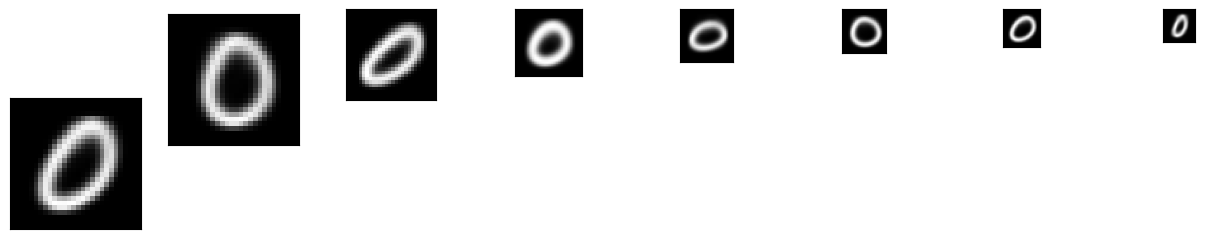

In [17]:
# 학습된 8개의 가우시안 평균 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(8):
    plt.subplot(i+1, 10, i+2)
    plt.imshow(gm.means_[i].reshape((28,28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

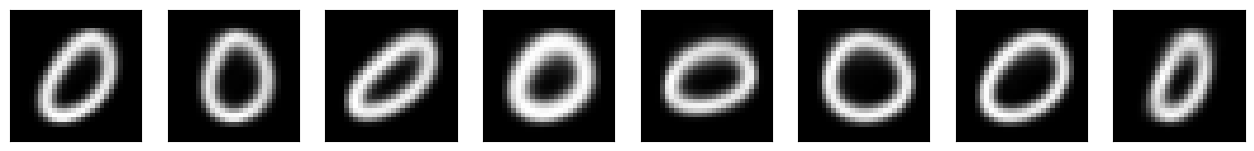

In [20]:
# 학습된 8개의 가우시안 평균 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(8):
    plt.subplot(1, 10, i+1)
    plt.imshow(gm.means_[i].reshape((28,28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

[[ 7.86258973e-04 -1.49452049e-03 -3.83663654e-05 ... -4.57266333e-04
  -6.09758518e-05 -6.33093135e-04]
 [ 7.95241695e-04  7.71368421e-04  9.78005785e-04 ...  1.28225283e-03
  -7.30995441e-04 -1.10624582e-03]
 [ 1.35314578e-03  3.81780744e-04  7.65653008e-04 ... -2.61304812e-04
   1.04050331e-03  1.18336723e-03]
 ...
 [-8.22195470e-04  1.85200362e-03  7.12200398e-04 ...  9.53164299e-04
  -1.35990833e-03  5.02053009e-04]
 [ 1.86083949e-04  1.08029983e-04 -1.96042695e-03 ... -4.54921899e-04
  -1.46996613e-03 -5.23416879e-04]
 [-3.14110641e-04  1.64583807e-03  1.50206648e-04 ...  1.87336159e-03
  -2.10764869e-03  1.57988986e-03]]


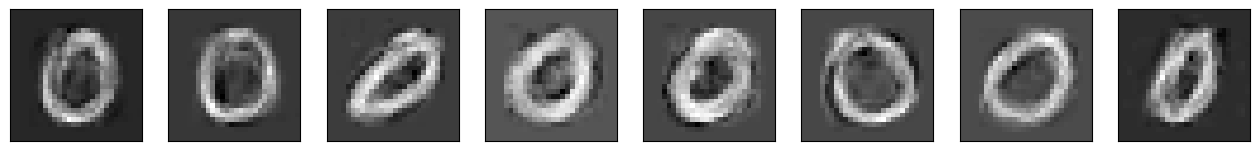

In [19]:
# 학습된 확률 기반으로 새로운 샘플 생성
gan = gm.sample(n_samples=8)
print(gan[0])

plt.figure(figsize=(16,4))

for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(gan[0][i].reshape((28,28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()